<a href="https://colab.research.google.com/github/BeataStultica/neural_network/blob/main/laba5_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import argparse 
from imutils import paths
import time 
import cv2 
import random
import os
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers import BatchNormalization
import zipfile
import zipfile
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
zip_file = '/content/gdrive/MyDrive/cats.zip'
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()

In [ ]:
fpath = "/content/cats/"
random_seed = 42

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nCategories = ", len(categories))

List of categories =  ['sphinx', 'norwegian_forest', 'caracal', 'british'] 

Categories =  4


In [ ]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))

No. of images loaded =  4043 
No. of labels loaded =  4043


In [ ]:
from keras.applications.inception_v3 import InceptionV3
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization

base_model = InceptionV3(input_shape = (227, 227, 3),weights='imagenet', include_top=False)

transfer_learning_arch = base_model.output
transfer_learning_arch = GlobalAveragePooling2D()(transfer_learning_arch)
transfer_learning_arch = Dense(1024, activation='relu')(transfer_learning_arch)
transfer_learning_arch = Dropout(0.4)(transfer_learning_arch)
transfer_learning_arch = Dense(512, activation='relu')(transfer_learning_arch)
transfer_learning_arch = Dropout(0.4)(transfer_learning_arch)
predictions = Dense(4, activation='softmax')(transfer_learning_arch)

transfer_learning_model = Model(inputs=base_model.input, outputs=predictions)
transfer_learning_model.summary()

#opt = Adadelta(lr=0.3, rho=0.95, epsilon=1e-08, decay=1e-2 / 100)
transfer_learning_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 113, 113, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 113, 113, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

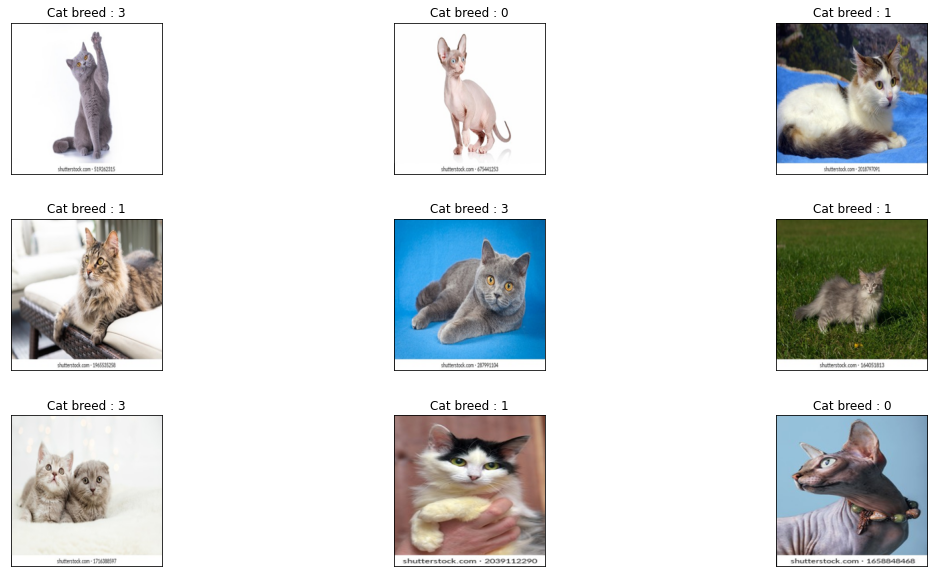

In [ ]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Cat breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()

images = np.array(images)
labels = np.array(labels)
display_rand_images(images, labels)

In [ ]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (3234, 227, 227, 3)
y_train shape =  (3234,)

x_test shape =  (809, 227, 227, 3)
y_test shape =  (809,)


In [ ]:
transfer_learning_model.fit(x_train, y_train, epochs=40, batch_size = 64, validation_data=(x_test, y_test), 
          steps_per_epoch=len(x_train)//64, validation_steps=len(x_test)//64)

Epoch 1/40
50/50 [==============================] - 51s 566ms/step - loss: 0.5781 - accuracy: 0.7978 - val_loss: 50.3233 - val_accuracy: 0.3268
Epoch 2/40
50/50 [==============================] - 29s 515ms/step - loss: 0.3028 - accuracy: 0.9095 - val_loss: 1.5023 - val_accuracy: 0.4167
Epoch 3/40
50/50 [==============================] - 25s 507ms/step - loss: 0.1876 - accuracy: 0.9388 - val_loss: 0.9754 - val_accuracy: 0.8112
Epoch 4/40
50/50 [==============================] - 26s 513ms/step - loss: 0.1835 - accuracy: 0.9423 - val_loss: 1.1406 - val_accuracy: 0.8320
Epoch 5/40
50/50 [==============================] - 26s 513ms/step - loss: 0.1210 - accuracy: 0.9580 - val_loss: 3.6687 - val_accuracy: 0.6628
Epoch 6/40
50/50 [==============================] - 25s 510ms/step - loss: 0.1395 - accuracy: 0.9603 - val_loss: 0.9484 - val_accuracy: 0.6081
Epoch 7/40
50/50 [==============================] - 25s 509ms/step - loss: 0.1086 - accuracy: 0.9672 - val_loss: 0.5012 - val_accuracy: 0.864

In [ ]:
loss, accuracy = transfer_learning_model.evaluate(x_test, y_test)

26/26 [==============================] - 5s 116ms/step - loss: 0.6525 - accuracy: 0.8813


In [ ]:
transfer_learning_model.save('laba5_inceptionv3_cats.h5')